# Plot figures of supplementary materials

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
import json
#script_dir = osp.realpath(__file__)
js_f = osp.normpath(osp.join("../aly","feat_dict.json"))
with open(js_f, 'r') as infile:
    feat_dict = json.load(infile)
feat_col = feat_dict['norm_onehot_feats'][0:8]
feat_col.append('ltt_shape_cat')
feat_col.append('gamma_cat')

In [155]:
feat_col1 = []
for item in feat_col:
    if 'norm' in item:
        temp = item[0:-5]
        if 'R0' in temp:
            feat_col1.append('R0')
        else:
            feat_col1.append(temp)
    else:
        feat_col1.append(item)

In [156]:
Models = ['LR','RF','XGBoost','DeepSet','SetTransformer','MLP','TabNet','DeepDynaTree-GAT','DeepDynaTree-GCN','DeepDynaTree-GIN','DeepDynaTree-PDGLSTM']
model_file = ['lr','rf','xgb','deepset','transet','mlp','tabnet','gat','gcn','gin','pdglstm']

### Permutation Importance

In [164]:
import csv

pmt_df = pd.DataFrame(columns=['Node Features','Models','reduced_acc','reduced_balance_acc','reduced_f1_weighted','reduced_f1_macro','reduced_brier_score','reduced_cross_entropy','reduced_macro_auc','reduced_weighted_auc'])
i = -1
j = 0
for model in model_file:
    print(model)
    i += 1
    with open(f"/mnt/data2/chaoyue/result/ddt/test/{model}50/None-test.csv") as f:
        r = csv.reader(f)
        for row in r:
            if model in ['lr','rf','xgb']:
                ref = np.array(row[0:-2])
            else:
                if model in ['transet','deepset','tabnet']:
                    ref = np.array(row[1:7]+row[9:-2])
                else:
                    ref = np.array(row[1:7]+row[9:-2])
            ref = ref.astype(float)
            break
    k = 0
    for feat in feat_col:
        title = [feat_col1[k],Models[i]]
        k += 1
        with open(f"/mnt/data2/chaoyue/result/ddt/test/{model}50/{feat}-test.csv") as f:
            r = csv.reader(f)
            for row in r:
                if model in ['lr','rf','xgb']:
                    record = np.array(row[0:-2])
                else:
                    if model in ['transet','deepset']:
                        record = np.array(row[1:7]+row[9:-2])
                    else:
                        record = np.array(row[1:7]+row[9:-2])
                record = record.astype(float)
                record = title+list(abs(record-ref)/ref[1])
                #record = title+list(abs(record-ref))
                pmt_df.loc[j] = record
                j += 1

lr
rf
xgb
deepset
transet
mlp
tabnet
gat
gcn
gin
pdglstm


In [165]:
pmt_df

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,oster,LR,0.024260,0.072913,0.024854,0.037372,0.025334,0.050451,0.056628,0.066442
1,oster,LR,0.024252,0.073452,0.024848,0.037587,0.025401,0.050383,0.056716,0.066648
2,oster,LR,0.024629,0.073352,0.025191,0.037740,0.025287,0.050229,0.056425,0.066274
3,oster,LR,0.025049,0.074295,0.025645,0.038355,0.025556,0.050817,0.057038,0.066826
4,oster,LR,0.024844,0.073830,0.025437,0.038055,0.025388,0.050298,0.056808,0.066670
...,...,...,...,...,...,...,...,...,...,...
5495,gamma_cat,DeepDynaTree-PDGLSTM,0.010700,0.006200,0.009900,0.011100,0.013200,0.019200,0.004200,0.005100
5496,gamma_cat,DeepDynaTree-PDGLSTM,0.010800,0.006300,0.010000,0.011200,0.013100,0.018900,0.004100,0.004800
5497,gamma_cat,DeepDynaTree-PDGLSTM,0.010100,0.005400,0.009400,0.010100,0.012500,0.018200,0.003900,0.004600
5498,gamma_cat,DeepDynaTree-PDGLSTM,0.010400,0.005600,0.009700,0.010700,0.012900,0.018800,0.004000,0.004800


In [166]:
pmt_df['Node Features'].unique()

array(['oster', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max',
       'cherries', 'BLD', 'R0', 'ltt_shape_cat', 'gamma_cat'],
      dtype=object)

In [167]:
feat_col

['oster-norm',
 'PD-norm',
 'abs_growth_rate-norm',
 'fraction_time_growth-norm',
 'r_max-norm',
 'cherries-norm',
 'BLD-norm',
 'new_R0-norm',
 'ltt_shape_cat',
 'gamma_cat']

In [168]:
for feat in feat_col:
    print(feat)
    if feat == 'new_R0-norm':
        print(sum(pmt_df[pmt_df['Node Features']=='R0']['reduced_balance_acc'].values))
    elif feat in ['ltt_shape_cat', 'gamma_cat']:
        print(sum(pmt_df[pmt_df['Node Features']==feat]['reduced_balance_acc'].values))
    else:
        print(sum(pmt_df[pmt_df['Node Features']==feat[0:-5]]['reduced_balance_acc'].values))

oster-norm
61.760746066796315
PD-norm
26.03257203851364
abs_growth_rate-norm
1.8497629921569274
fraction_time_growth-norm
2.0165839981530693
r_max-norm
4.275697296314802
cherries-norm
4.265189041664475
BLD-norm
24.477206904683708
new_R0-norm
1.759839396187157
ltt_shape_cat
2.5983700121924675
gamma_cat
2.4437332953796354


In [183]:
a123 = pmt_df[pmt_df['Models']=='DeepDynaTree-PDGLSTM']
a123[a123['Node Features']=='PD']['reduced_balance_acc'].sum()/50

0.04124200000000006

In [169]:
feat_dict = {'gamma_cat':r'$\gamma$', 
             'oster':'Oster', 
             'PD':'PD', 
             'R0':r'$R_0$',
             'abs_growth_rate':'Abs Growth Rate',
             'fraction_time_growth':'Fraction Time Growth',
             'r_max':r'$R_{max}$',
             'ltt_shape_cat':'LTT Shape',
             'cherries':'Cherries',
             'BLD':'BLD' }

In [170]:
pmt_df['Node Features'] = pmt_df['Node Features'].map(feat_dict)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


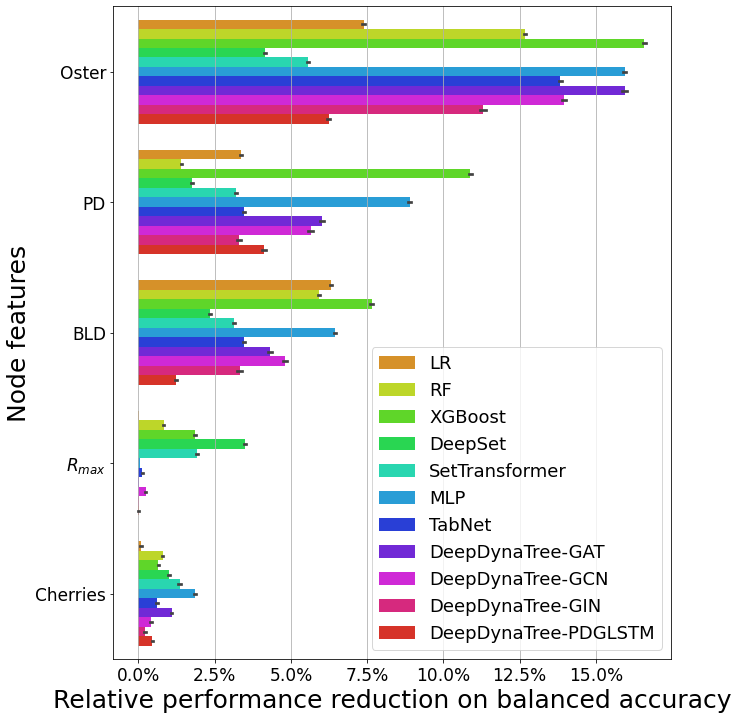

In [172]:
from matplotlib import ticker
df1 = pmt_df[pmt_df["Node Features"]=="Cherries"]
df1.loc[df1["Node Features"]=="Cherries","Node Features"] = "Cherries"
#df1.loc[df1["Node Features"]=="v_sampling_fraction","Node Features"] = 'Sampling Fraction'
for feat in ['$R_{max}$',"BLD","PD","Oster"]:
    df = pmt_df[pmt_df["Node Features"]==feat]
    if feat in ["v_cluster_size"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Cluster Size'
    if feat in ["v_timespan"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Time Span'
    if feat in ["Oster"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Oster'
    if feat in ["Cherries"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Cherries'
    df1 = pd.concat([df,df1],axis=0,ignore_index=True)

fig1 = plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 17})
ax = sns.barplot(y="Node Features",x="reduced_balance_acc",hue = "Models",ci='sd',data=df1,palette=sns.hls_palette(11, h=.1, l=.5, s=.9))
ax.set_xlim(-.005,.35)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=1))
plt.legend(loc=4,fontsize=18)
plt.grid(axis="x")
#plt.xticks(rotation=70)
plt.ylabel('Node features',fontsize=25)
plt.xlabel('Relative performance reduction on balanced accuracy',fontsize=25)
plt.show()
fig1.savefig('../paper/whole_impt.svg',dpi=1200, format='svg',bbox_inches='tight')

In [18]:
df1

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,Oster,LR,0.046232,0.138951,0.047364,0.071220,0.048278,0.096144,0.107917,0.126619
1,Oster,LR,0.046217,0.139978,0.047353,0.071630,0.048407,0.096014,0.108083,0.127011
2,Oster,LR,0.046936,0.139786,0.048005,0.071922,0.048190,0.095721,0.107530,0.126299
3,Oster,LR,0.047736,0.141583,0.048871,0.073092,0.048702,0.096842,0.108696,0.127350
4,Oster,LR,0.047345,0.140697,0.048474,0.072521,0.048381,0.095853,0.108258,0.127052
...,...,...,...,...,...,...,...,...,...,...
2745,Cherries,DeepDynaTree-PDGLSTM,0.008303,0.005032,0.008051,0.011574,0.009435,0.014467,0.005284,0.007422
2746,Cherries,DeepDynaTree-PDGLSTM,0.008932,0.005787,0.008680,0.011951,0.010190,0.015474,0.005535,0.007926
2747,Cherries,DeepDynaTree-PDGLSTM,0.008555,0.005913,0.008177,0.011700,0.009435,0.014593,0.005284,0.007548
2748,Cherries,DeepDynaTree-PDGLSTM,0.009058,0.006038,0.008680,0.012454,0.010064,0.015474,0.005535,0.007800


### ROC curve

In [19]:
area=['0.675','0.709','0.699','0.635','0.637','0.693','0.656','0729','0.783','0.827','0.882']

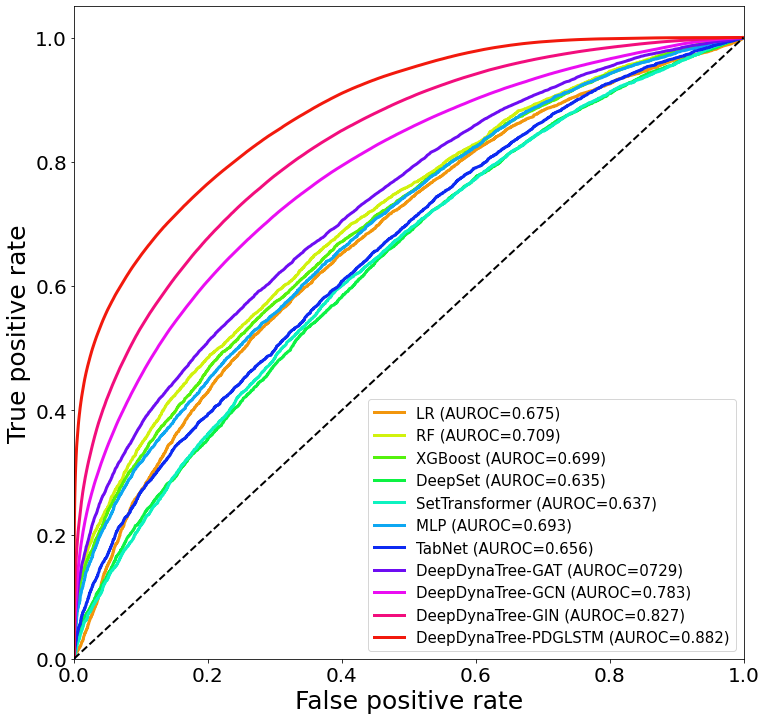

In [21]:
from itertools import cycle
from matplotlib.colors import ListedColormap
fig2 = plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 20})
i = 0
#colors = cycle(['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey'])
my_cmap = sns.hls_palette(11, h=.1, l=.5, s=.9)
for model,color in zip(model_file,my_cmap):
    roc = pd.read_csv(f"/mnt/data2/chaoyue/result/ddt/test/ROC/roc_{model}.csv")
    fpr = roc["fpr"]
    tpr = roc["tpr"]
    if model == 'glstm':
        plt.plot(fpr, tpr,
                 label=f"{Models[i]} (AUROC={area[i]})",
                 color=color, linewidth=5)
    else:
        plt.plot(fpr, tpr,
                 label=f"{Models[i]} (AUROC={area[i]})",
                 color=color, linewidth=3)
    i += 1

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate',fontsize=25)
plt.ylabel('True positive rate',fontsize=25)
#plt.title('Macro-Average Receiver Operating Characteristic Curves')
plt.legend(loc="lower right",fontsize=15)
plt.show()
fig2.savefig('../paper/whole_roc.svg',dpi=600,format='svg')

### Confusion matrix

In [18]:
labels = ['Decay','Static','Growth']
cm_Models = ['LR','RF','XGBoost','DeepSet','SetTransformer','MLP','TabNet','DeepDynaTree-GAT','DeepDynaTree-GCN','DeepDynaTree-GIN','DeepDynaTree-PDGLSTM']
cm_model_file = ['lr','rf','xgb','deepset','transet','mlp','tabnet','gat','gcn','gin','pdglstm']

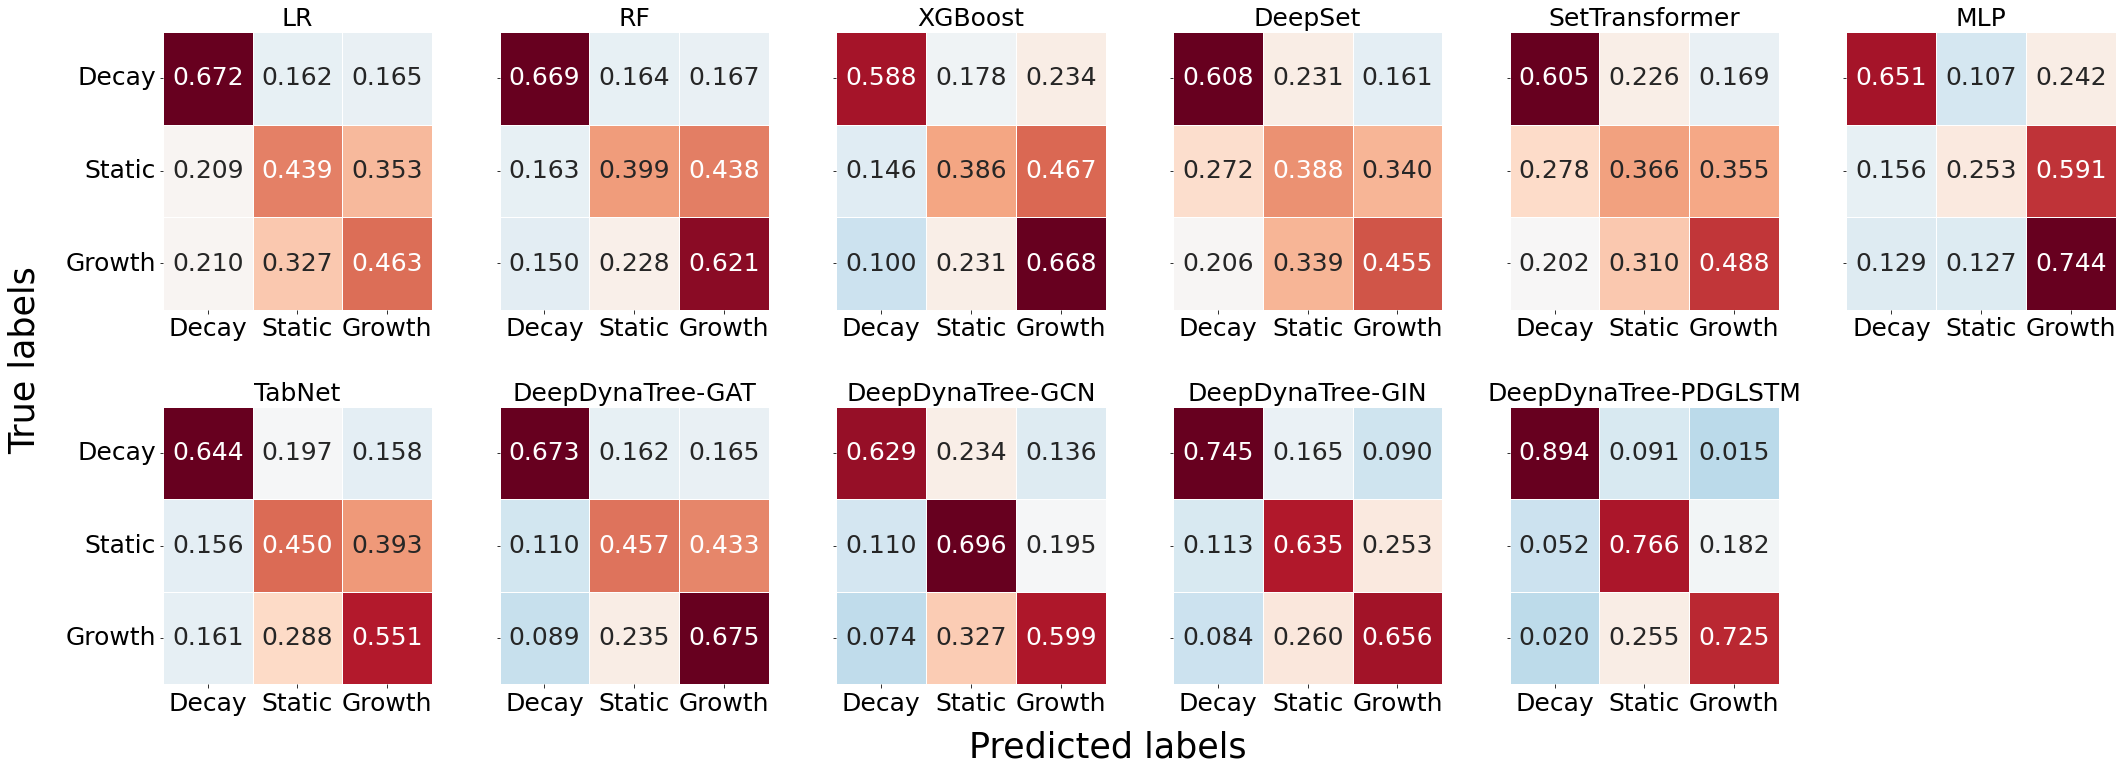

In [19]:
from sklearn.metrics import confusion_matrix
i=0
rdgn = sns.diverging_palette(h_neg=110, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
fig3, ax = plt.subplots(2,6, sharex=False, sharey=True,figsize=(35,12))
ax[-1, -1].axis('off')
plt.rcParams.update({'font.size': 25})
for model,(i,axi) in zip(cm_model_file,enumerate(ax.flat)):
    cm = pd.read_csv(f"/mnt/data2/chaoyue/result/ddt/test/cm/cm_{model}.csv")
    cm.loc[cm['true']==0,'true'] = 111
    cm.loc[cm['true']==1,'true'] = 0
    cm.loc[cm['true']==111,'true'] = 1
    cm.loc[cm['predict']==0,'predict'] = 111
    cm.loc[cm['predict']==1,'predict'] = 0
    cm.loc[cm['predict']==111,'predict'] = 1
    y_test_arr = cm["true"]
    y_test_pred = cm["predict"]
    conf_mat = confusion_matrix(y_test_arr, y_test_pred, normalize="true")
    
    sns.heatmap(conf_mat, center=0.2,annot=True, fmt=".3f", linewidths=.5, cmap='RdBu_r', ax=axi, cbar=False,annot_kws={"fontsize":25})
    
    
    axi.set_xticklabels(labels, fontsize=25)
    axi.set_yticklabels(labels, fontsize=25)
    plt.setp(axi.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    axi.set_title(cm_Models[i],fontsize=25)
    # Rotate the tick labels and set their alignment.
fig3.text(0.07,0.4,'True labels', ha='center',fontsize=35,rotation=90)

#ax[4].set_xlabel('Predicted labels', fontsize=25)
fig3.text(0.5,0.04,'Predicted labels', ha='center',fontsize=35)
plt.subplots_adjust(wspace =.25, hspace =.35)
fig3.savefig('../paper/whole_cm.svg',dpi=600, bbox_inches='tight', pad_inches=1, format='svg')
plt.show()

### Embedding Visualization

In [45]:
label_map = {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}

In [46]:
label_map

{0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}

In [137]:
model='tabnet'

In [138]:
import os
import os.path as osp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from copy import deepcopy
plt.rcParams.update({'font.size': 20})
class AlyTSNE(object):
    def __init__(self, feat, perplexity, label, subset, save_folder, model=model):
        self.feat = feat
        self.label = label
        self.perplexity = perplexity
        self.subset = subset
        self.save_folder = save_folder
        self.model = model
        os.makedirs(self.save_folder, exist_ok=True)

    def generate_tsne(self, use_pca=False, overwrite=False, **kwargs):
        """
        Generate the t-sne representation
        :param subset:
        :param use_pca:
        :param kwargs:
        :return:
        """
        pca_dim = kwargs.get("pca_dim", 5)
        random_state = kwargs.get("random_seed", 0)

        if use_pca:
            t_sne_f = osp.join(self.save_folder, "{}_PCA_{}.npy".format(self.subset, pca_dim))
        else:
            t_sne_f = osp.join(self.save_folder, "{}.npy".format(self.model))
        self.t_sne_f = t_sne_f

        if osp.exists(t_sne_f) and not overwrite:
            print("Not saved! The t-SNE feature file has already exited. {}".format(t_sne_f))
            return 1

        if use_pca:
            pca = PCA(n_components=pca_dim, svd_solver='full', random_state=random_state)
            pca.fit(self.feat)
            reduced_feat = pca.transform(self.feat)
        else:
            reduced_feat = self.feat

        model = TSNE(n_components=2,perplexity=self.perplexity, random_state=random_state)
        x_tsne = model.fit_transform(reduced_feat)
        saved_dict = {"x_tsne": x_tsne, "label": self.label}

        np.save(self.t_sne_f, saved_dict)
        print("{} is done.".format(self.subset))

    def plot(self, **kwargs):
        overwrite = kwargs.get("overwrite", False)
        legend_info = kwargs.get("legend_info", None)

        tsne_plot_path = osp.join(self.save_folder)
        os.makedirs(tsne_plot_path, exist_ok=True)

        tsne_dict = np.load(self.t_sne_f, allow_pickle=True).item()
        tsne_dict["t-SNE-1"] = tsne_dict["x_tsne"][:, 0]
        tsne_dict["t-SNE-2"] = tsne_dict["x_tsne"][:, 1]
        del tsne_dict["x_tsne"]
        plot_df = pd.DataFrame.from_dict(tsne_dict)
        print(plot_df.head())

        plot_fig = osp.join(tsne_plot_path, "{}_{}.png".format(self.subset,model))
        plot_eps_fig = osp.join(tsne_plot_path, "{}_{}.svg".format(self.subset,model))

        #sns.set(style="whitegrid")  # whitegrid, darkgrid
        #sns.set_context("poster")

        # With self cmp and markers
        # cmap = sns.dark_palette("#2ecc71", as_cmap=True)
        # cmap = {"wee1-1": "#984ea3", "wee1-0": "#b3cde3",  # 1: #4daf4a; 40: beaed4;
        #         "sahh-1": "#386cb0", "sahh-0": "#fdc086",  # fdc086
        #         "pa2ga-1": "#f0027f", "pa2ga-0": "#ccebc5"}  # ffff99
        # # cmap = sns.color_palette("husl", 6)
        # # cmap = sns.color_palette("Set1", n_colors=8, desat=.5)
        # fig = sns.lmplot(x="t-SNE-1", y="t-SNE-2", data=plot_df, hue="target_label",
        #                  fit_reg=False, legend=False, height=15, aspect=1.6,
        #                  scatter_kws={"alpha": 0.8, "s": 60}, palette=cmap,
        #                  markers=["x", ".", "x", ".", "x", "."])  # palette=cmap

        # Without self cmp
        fig = sns.lmplot(x="t-SNE-1", y="t-SNE-2", data=plot_df, hue="label",
                         fit_reg=False, legend=False, height=7.5, aspect=1,
                         scatter_kws={"alpha": 0.8, "s":40})  # palette=cmap
        #plt.title('DeepDynaTree-GCN',fontsize=30)
        #plt.title('DeepDynaTree-PDGLSTM',fontsize=30)
        plt.title('TabNet',fontsize=30)

        # Avg:[height=15 "s": 2000]
        ax = fig.fig.get_axes()[0]

        # Sort the legend order
        # https://stackoverflow.com/questions/22263807/how-is-order-of-items-in-matplotlib-legend-determined
        handles, labels = ax.get_legend_handles_labels()
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
        print(labels)
        #leg = ax.legend(handles, labels, loc="upper right", ncol=1, borderaxespad=0., fontsize=40,bbox_to_anchor=(1, 1))
        # leg = ax.legend(loc="best", ncol=1, borderaxespad=0., fontsize=30)  # bbox_to_anchor=(1.05, 1), title="Molecule", title_fontsize=30,

        if legend_info:
            for t in leg.texts:
                inside_df_legend_label = t.get_text()
                t.set_text(legend_info.get(int(float(inside_df_legend_label)), inside_df_legend_label))
                # print(t.get_text())

        # ax.tick_params(labelsize=40)  #
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        # ax.get_xaxis().set_ticks([])
        # ax.get_yaxis().set_ticks([])
        #for lh in leg.legendHandles:
        #    lh.set_alpha(0.8)
        #    lh._sizes = [200]  # Avg:[1000]

        ax.set_xlabel("", fontsize=30)  #
        ax.set_ylabel("", fontsize=30)  #
        #ax.set_xticks([-80,-60,-40,-20,0,20,40,60])
        ax.grid(False)

        plt.tight_layout()
        plt.show()
        # return 1
        if os.path.exists(plot_eps_fig) and not overwrite:
            # and os.path.exists(plot_eps_fig)
            print("Not saved! The figure {}.png has already existed.".format(plot_fig))
        else:
            print("Save the plot {}".format(plot_eps_fig))
            fig.savefig(plot_fig, dpi=300)
            fig.savefig(plot_eps_fig, dpi=300)

In [139]:
glstm_x = np.load(f"/mnt/data2/chaoyue/result/ddt/test/embedding/{model}_embedding.npy")
glstm_y = np.load(f"/mnt/data2/chaoyue/result/ddt/test/embedding/{model}_labels.npy")

In [140]:
non_bg = np.where(glstm_y[:,0]!=3)
non_bg[0].shape

(1397162,)

In [141]:
glstm_x = glstm_x[non_bg[0],:]
glstm_y = glstm_y[non_bg[0]]

In [142]:
import random
tree_ids = list(set(glstm_y[:,1]))
random.shuffle(tree_ids)

In [143]:
tree_ids=[2963.0, 5977.0, 5381.0, 5410.0, 4759.0, 2175.0, 6757.0, 610.0,
 16058.0, 8971.0, 6260.0, 6352.0, 2573.0, 5585.0, 4827.0, 2408.0,
 2799.0, 8900.0, 7029.0, 11434.0, 8057.0, 5812.0, 4156.0, 5301.0,
 10607.0, 3374.0, 1762.0, 18092.0, 3837.0, 1762.0]


In [144]:
np.where(np.array(tree_ids)>10000)

(array([ 8, 19, 24, 27]),)

In [145]:
sub_nodes = np.where(np.isin(glstm_y[:,1],tree_ids))

In [146]:
glstm_x = glstm_x[sub_nodes[0],:]
glstm_y = glstm_y[sub_nodes[0],:]

In [147]:
glstm_x.shape

(19335, 64)

In [148]:
len(np.where(glstm_y[:,0]==0)[0])

13443

/home/chaoyue/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/chaoyue/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


test is done.
   label   t-SNE-1    t-SNE-2
0      0  6.497659  68.094177
1      0  6.497659  68.094177
2      0  6.497659  68.094177
3      0  6.473913  67.464584
4      0  5.918819  67.821480
('2', '1', '0')


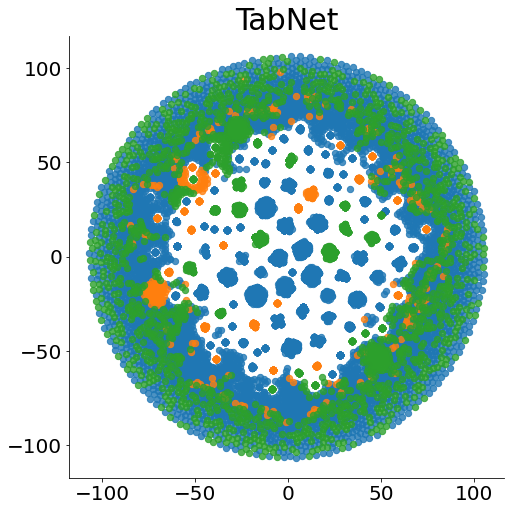

Save the plot ../checkpoints/03262023/split_rs123/models_norm_input2/tsne/org/test_tabnet.svg


In [149]:
legend_info = deepcopy(label_map)
ds_name = '03262023'
split_rs = '123'
tsne_folder = f'../checkpoints/{ds_name}/split_rs{split_rs}/models_norm_input2/tsne'
aly_test_tsne = AlyTSNE(feat=glstm_x, perplexity=50, label=glstm_y[:,0], subset='test', save_folder=f'{tsne_folder}/org')
aly_test_tsne.generate_tsne(overwrite=False)
aly_test_tsne.plot()

### Cross test on resp and tb trained models

In [22]:
labels = ['Decay','Static','Growth']
cm_Models = ['PDGLSTM_ARI','PDGLSTM_TB','PDGLSTM_ARI_TB']
cm_model_file = ['resp_resp','tb_resp','resp+tb_resp','resp_tb','tb_tb','resp+tb_tb']

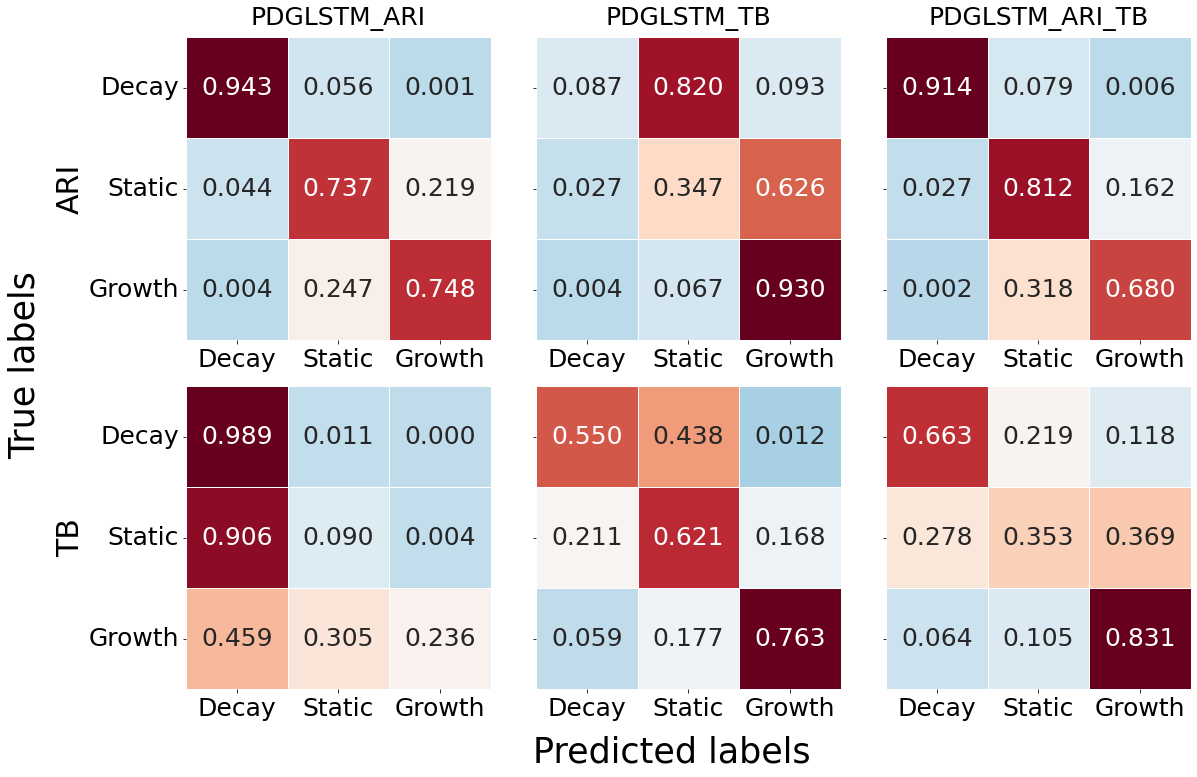

In [39]:
from sklearn.metrics import confusion_matrix
i=0
rdgn = sns.diverging_palette(h_neg=110, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
fig3, ax = plt.subplots(2,3, sharex=False, sharey=True,figsize=(18,12))
#ax[-1, -1].axis('off')
plt.rcParams.update({'font.size': 25})
for model,(i,axi) in zip(cm_model_file,enumerate(ax.flat)):
    cm = pd.read_csv(f"/mnt/data2/chaoyue/result/ddt/test/cm_cross_test/cm_{model}.csv")
    cm.loc[cm['true']==0,'true'] = 111
    cm.loc[cm['true']==1,'true'] = 0
    cm.loc[cm['true']==111,'true'] = 1
    cm.loc[cm['predict']==0,'predict'] = 111
    cm.loc[cm['predict']==1,'predict'] = 0
    cm.loc[cm['predict']==111,'predict'] = 1
    y_test_arr = cm["true"]
    y_test_pred = cm["predict"]
    conf_mat = confusion_matrix(y_test_arr, y_test_pred, normalize="true")
    
    sns.heatmap(conf_mat, center=0.2,annot=True, fmt=".3f", linewidths=.5, cmap='RdBu_r', ax=axi, cbar=False,annot_kws={"fontsize":25})
    
    
    axi.set_xticklabels(labels, fontsize=25)
    axi.set_yticklabels(labels, fontsize=25)
    plt.setp(axi.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    if i == 0:
        axi.set_ylabel('ARI', fontsize=30)
    if i == 3:
        axi.set_ylabel('TB', fontsize=30)
    if i in [0,1,2]:
        axi.set_title(cm_Models[i],fontsize=25, pad=12)
    # Rotate the tick labels and set their alignment.
fig3.text(0.0,0.4,'True labels', ha='center',fontsize=35,rotation=90)

#ax[0].set_ylabel('ARI', fontsize=25)
fig3.text(0.5,0.04,'Predicted labels', ha='center',fontsize=35)
plt.subplots_adjust(wspace =.15, hspace =.15)
fig3.savefig('../paper/cross_cm.svg',dpi=600, bbox_inches='tight', pad_inches=1, format='svg')
plt.show()